## Built-in Functions

### io.BytesIO()
a very fast way to write binary data into memory

- Explanation: 
https://medium.com/swlh/python-stringio-and-bytesio-compared-with-open-c0e99b9def31
- Examples:
    - read and write  
    https://stackoverflow.com/questions/53485708/how-the-write-read-and-getvalue-methods-of-python-io-bytesio-work
    - for image  
    shown below

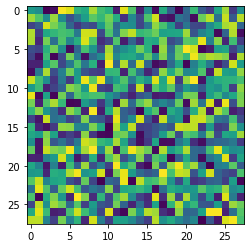

In [12]:
# Example 2
import matplotlib.pyplot as plt
import numpy as np
import io
from PIL import Image

images = []
x = np.random.random(size=(28,28))
plt.imshow(x)

# Save the figure
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0) # go to the start of the stream
image = Image.open(buf)
images.append(np.array(image))

### vars()
Python function `vars()` will allow you to use a for loop to define and set multiple variables with a similar name, such as var1, var2, var3.  

Python classes have an attribute called `__dict__`.
- `__dict__` is a Python dictionary that contains the object's instance variables and values as key value pairs.

If you call `vars()` and pass in an object, it will call the object's `__dict__` attribute, which is a Python dictionary containing the object's instance variables and their values as ke

In [4]:
# Example
class MyClass:
    def __init__(self):
        self.var1 = 1

my_obj = MyClass()

print(my_obj.__dict__)
print(vars(my_obj))

{'var1': 1}
{'var1': 1}


In [5]:
# Add a new instance variable and give it a value
my_obj.var2 = 2

# Calls vars() again to see the object's instance variables
vars(my_obj)

{'var1': 1, 'var2': 2}

In [6]:
# Call vars, passing in the object.  Then access the __dict__ dictionary using square brackets
vars(my_obj)['var3'] = 3

# Call vars() to see the object's instance variables
vars(my_obj)

{'var1': 1, 'var2': 2, 'var3': 3}

Notice that when using vars(), you can now pass in the name of the variable var3 as a string.

What if you plan to use several variables that are similarly named (var4, var5 ... var9) and wanted a convenient way to access them by incrementing a number?

Try this：

In [7]:
# Use a for loop to increment the index 'i'
for i in range(4,10):
    # Format a string that is var
    vars(my_obj)[f'var{i}'] = 0
    
# View the object's instance variables!
vars(my_obj)

{'var1': 1,
 'var2': 2,
 'var3': 3,
 'var4': 0,
 'var5': 0,
 'var6': 0,
 'var7': 0,
 'var8': 0,
 'var9': 0}

## Utils

### Various ways of passing in the inputs 

In [1]:
def fun1(args=()):
    print(f"number of arguments passed is {len(args)}")
    
    
list_of_inputs = [1,2]
print("When passing in args=list_of_inputs:")
fun1(args=list_of_inputs)
print()
print("When passing in args=(list_of_inputs)")
fun1(args=(list_of_inputs))
print()
print("When passing in args=(list_of_inputs,)")
fun1(args=(list_of_inputs,))

When passing in args=list_of_inputs:
number of arguments passed is 2

When passing in args=(list_of_inputs)
number of arguments passed is 2

When passing in args=(list_of_inputs,)
number of arguments passed is 1


### Download and resize image (from a url)

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256):
    '''
    Fetches an image online, resizes it and saves it locally.
    
    Args:
        url (string) -- link to the image
        new_width (int) -- size in pixels used for resizing the width of the image
        new_height (int) -- size in pixels used for resizing the length of the image
        
    Returns:
        (string) -- path to the saved image
    '''
    
    
    # create a temporary file ending with ".jpg"
    _, filename = tempfile.mkstemp(suffix=".jpg")
    
    # opens the given URL
    response = urlopen(url)
    
    # reads the image fetched from the URL
    image_data = response.read()
    
    # puts the image data in memory buffer
    image_data = BytesIO(image_data)
    
    # opens the image
    pil_image = Image.open(image_data)
    
    # resizes the image. will crop if aspect ratio is different.
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    
    # converts to the RGB colorspace
    pil_image_rgb = pil_image.convert("RGB")
    
    # saves the image to the temporary file created earlier
    pil_image_rgb.save(filename, format="JPEG", quality=90)
    
    print("Image downloaded to %s." % filename)
    
    return filename

## numpy